# **Cantidad pedida**



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_probabilístico")
data

,f(x),D,K,h,p,E{x},cantidad_pedido,reorden
0,50,1000,150,3,15,50,317.8207,46.8200
1,25,2000,200,2,20,25,448.8800,24.4300
2,100,1000,100,2,10,100,319.4380,93.6110
3,25,1125,110,4,12,25,249.6700,23.1505
4,35,825,67,3,10,35,193.1967,32.5411
5,60,838,133,2,12,60,335.8560,55.9900
6,30,870,66,7,10,30,129.6500,26.8690
7,75,1008,55,13,20,75,94.6670,70.4200
8,20,1109,124,9,19,20,175.5600,18.5000
9,28,885,112,8,16,28,158.6700,57.5400


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["f(x)","D","K","h","p","E{x}"]])
targets = np.asarray(data["cantidad_pedido"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 15)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

27.118000000000002

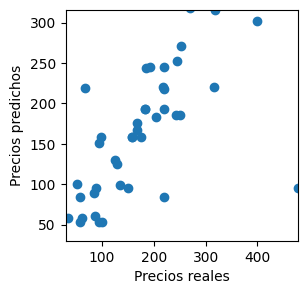

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(30,targets.max())
plt.ylim(30,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[  50, 1000,  150,    3,   15,   50],
       [  35,  825,   67,    3,   10,   35],
       [  36,  965,  131,    4,   14,   36],
       [  65, 1163,   86,    9,   24,   65],
       [  13,  810,  108,    7,   17,   13],
       [  10,  876,  106,   19,   29,   10],
       [  26,  854,  132,   23,   43,   26],
       [  15, 1086,   66,   43,   93,   15],
       [   6,  914,  118,   24,   84,    6],
       [  76,  894,  129,   31,   99,   76]])

In [ ]:
cop = d_tree.predict([[40,	1189,	87,	27	,20,	40]])

In [ ]:
cop

array([478.586])

# **Punto de Reorden**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_probabilístico")
data

,f(x),D,K,h,p,E{x},cantidad_pedido,reorden
0,50,1000,150,3,15,50,317.8207,46.8200
1,25,2000,200,2,20,25,448.8800,24.4300
2,100,1000,100,2,10,100,319.4380,93.6110
3,25,1125,110,4,12,25,249.6700,23.1505
4,35,825,67,3,10,35,193.1967,32.5411
5,60,838,133,2,12,60,335.8560,55.9900
6,30,870,66,7,10,30,129.6500,26.8690
7,75,1008,55,13,20,75,94.6670,70.4200
8,20,1109,124,9,19,20,175.5600,18.5000
9,28,885,112,8,16,28,158.6700,57.5400


In [ ]:
features = np.asarray(data[["f(x)","D","K","h","p","E{x}"]])
targets = np.asarray(data["reorden"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

24.386000000000003

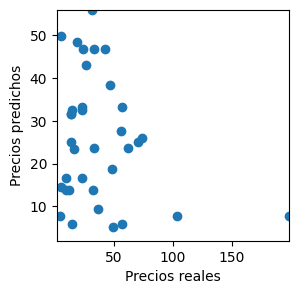

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(2,targets.max())
plt.ylim(2,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[  75, 1008,   55,   13,   20,   75],
       [  48, 1049,  135,    7,   13,   48],
       [  13,  810,  108,    7,   17,   13],
       [  10,  876,  106,   19,   29,   10],
       [  90,  984,  123,    9,   21,   90],
       [  10,  937,  136,    4,   19,   10],
       [   6,  914,  118,   24,   84,    6],
       [ 200, 1026,  117,    5,   11,  200],
       [ 131, 1067,  130,   90,  110,  131],
       [ 213,  918,  139,   34,   86,  213]])

In [ ]:
cop = d_tree.predict([[40,	1189,	87,	27	,20,	40]])

In [ ]:
cop

array([57.447])